# Decision Tree Assignment

In [121]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
# from sklearn.externals.six import StringIO  
from IPython.display import Image
import pydotplus

In [74]:
df = pd.read_csv('https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv')

In [75]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [76]:
df.shape

(891, 12)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [78]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [79]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
# Dropping Cabin column as it has very much null values
df.drop('Cabin', axis=1, inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [81]:
# Filling Null Values of Age with Mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [82]:
df.Age.mean()

29.699117647058763

In [83]:
df.Embarked.mode()[0]

'S'

In [84]:
# Filling Null values of Embarked Column with mode
df['Embarked'].fillna(df.Embarked.mode()[0], inplace=True)

In [85]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [86]:
def freq_plot(var, plt_size=(8,6)):
    temp = df[var].value_counts()
    plt.figure(figsize=plt_size)
    plt.bar(temp.index.values, temp)
    plt.xticks(temp.index, temp.index.values)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

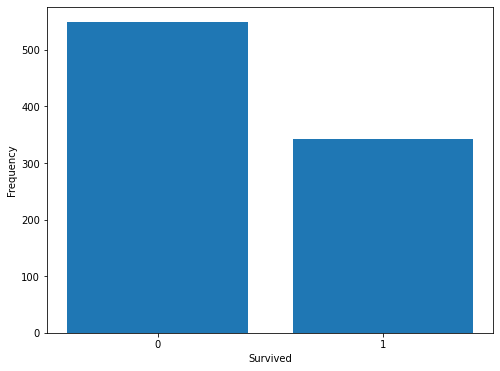

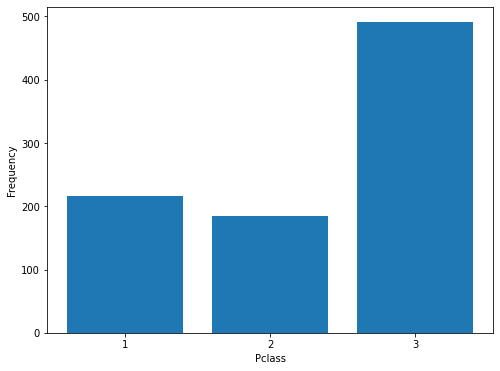

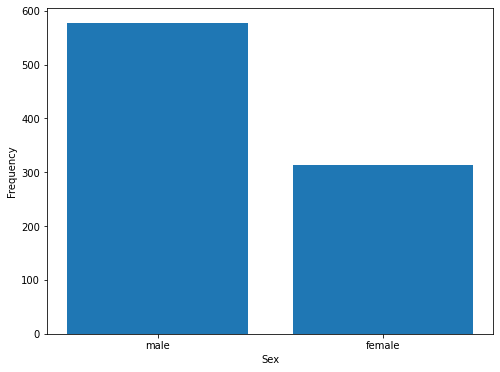

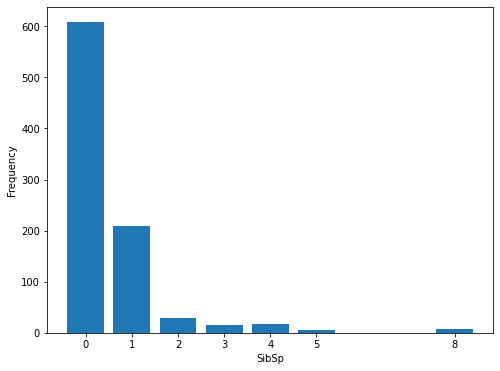

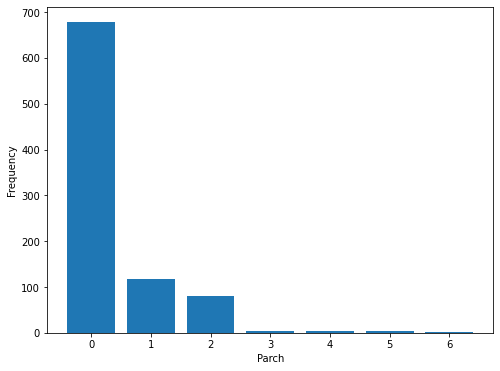

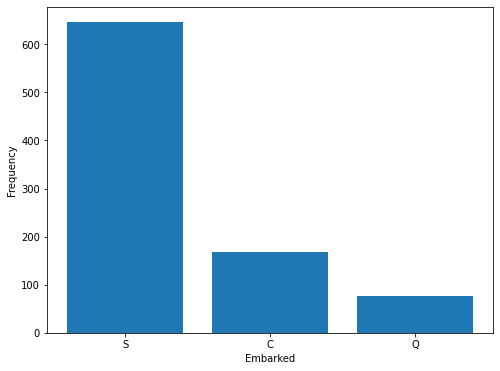

In [87]:
freq_list = ['Survived', 'Pclass', 'Sex', 'SibSp',
       'Parch', 'Embarked']

for i in freq_list:
    freq_plot(i)

/Users/sarthakgupta/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 864x720 with 0 Axes>

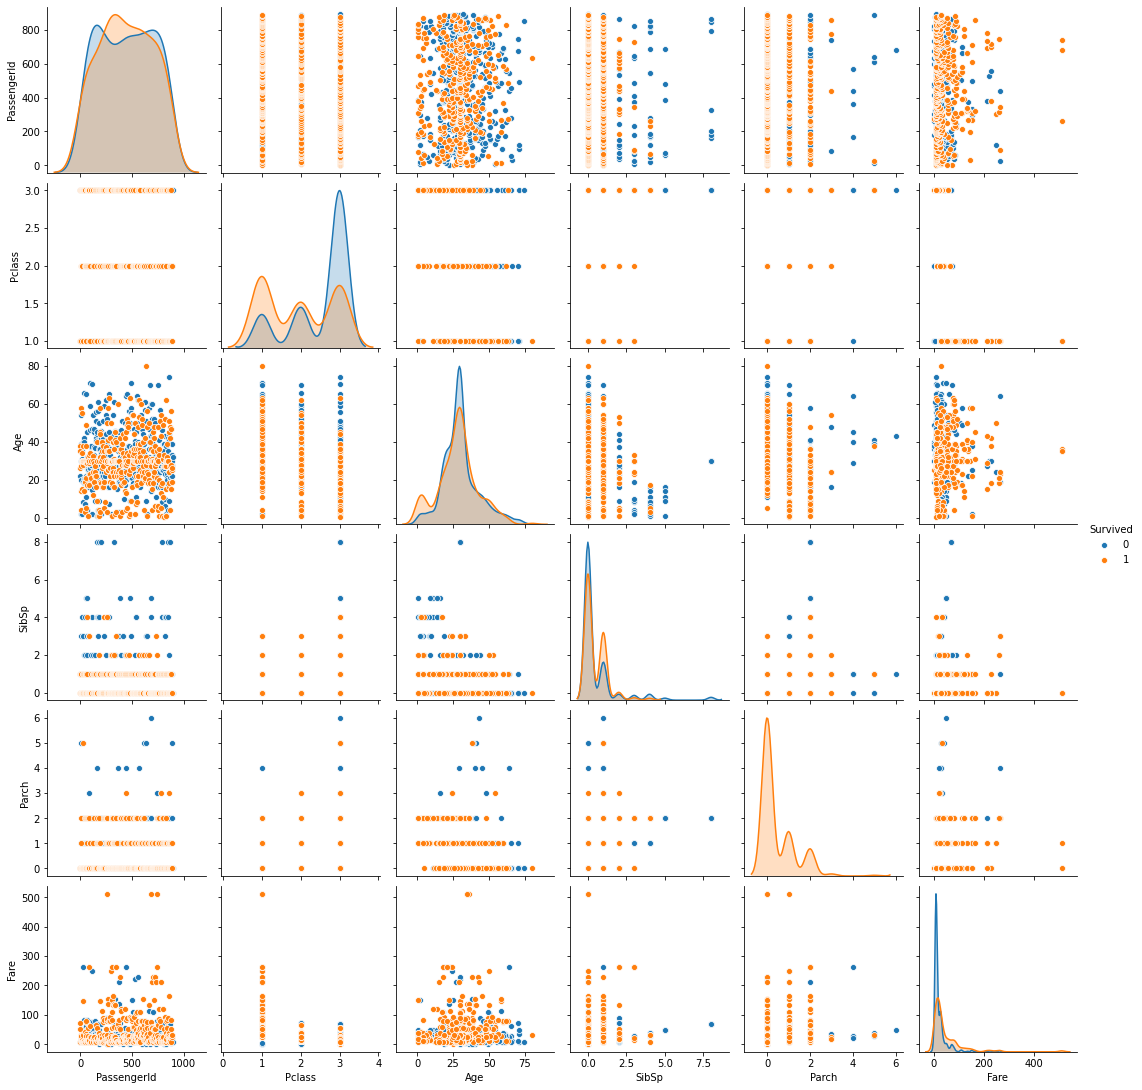

In [88]:
plt.figure(figsize=[12,10])
sns.pairplot(df, hue='Survived')
plt.show()

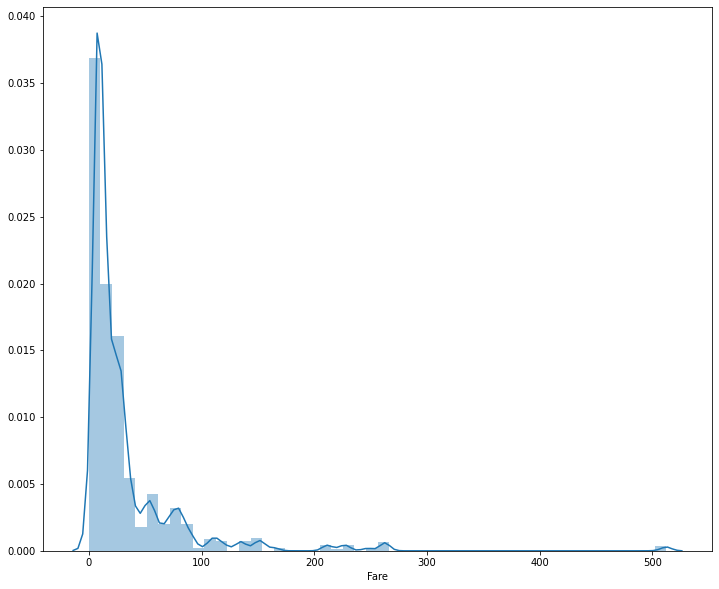

In [89]:
plt.figure(figsize=[12,10])
sns.distplot(df.Fare)
plt.show()

In [90]:
# log_fare = np.log(df.Fare)
# print('Max =', log_fare.max())
# print('Min =', log_fare.min())
# print('Mean =', log_fare.mean())
# # log_fare

In [91]:
# Standardizing Fares
sc = StandardScaler()
df['Fare'] = sc.fit_transform(df[['Fare']])

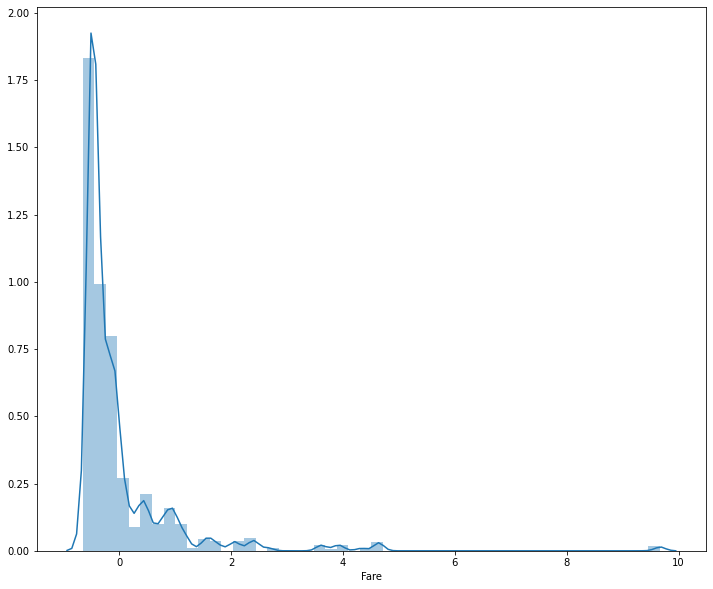

In [92]:
plt.figure(figsize=[12,10])
sns.distplot(df.Fare)
plt.show()

/Users/sarthakgupta/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


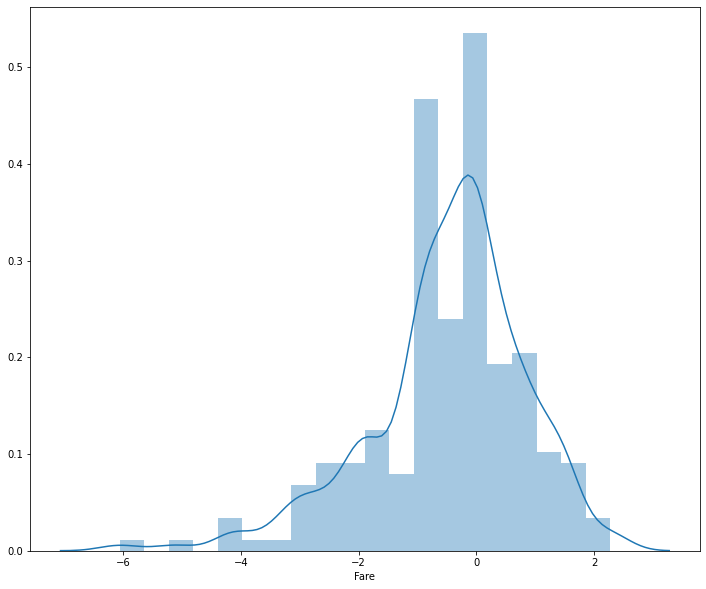

In [93]:
# Log Normalization of Fares
plt.figure(figsize=[12,10])
sns.distplot(np.log(df.Fare))
plt.show()

In [94]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [95]:
df.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

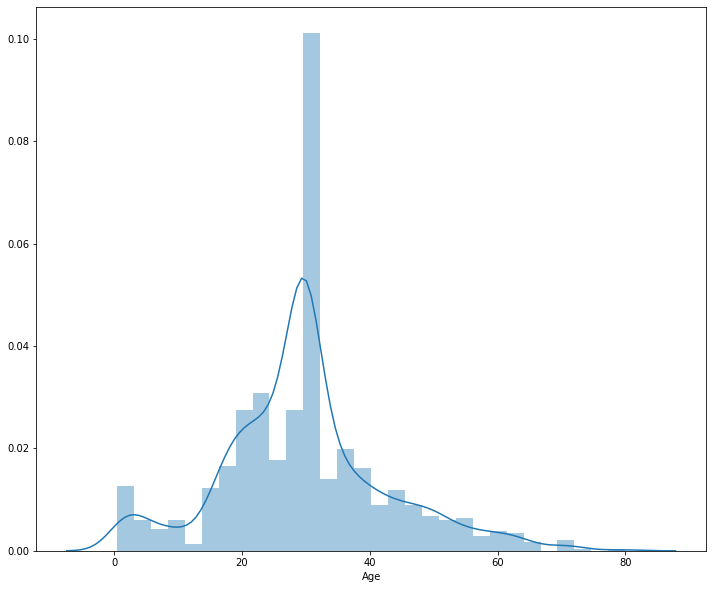

In [96]:
plt.figure(figsize=[12,10])
sns.distplot(df.Age)
plt.show()

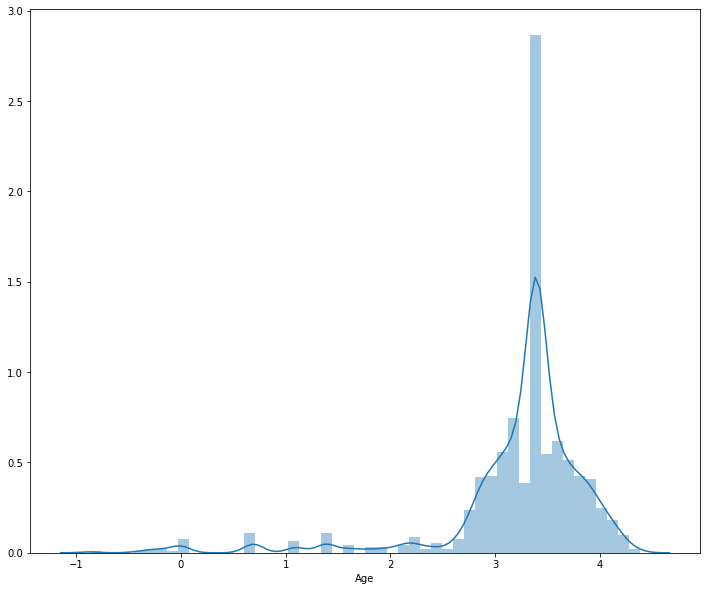

In [97]:
plt.figure(figsize=[12,10])
sns.distplot(np.log(df.Age))
plt.show()

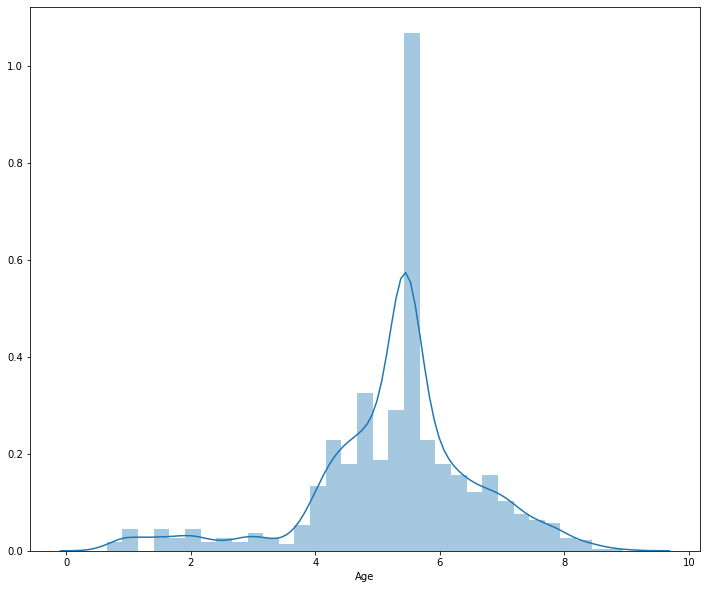

In [98]:
plt.figure(figsize=[12,10])
sns.distplot(np.sqrt(df.Age))
plt.show()

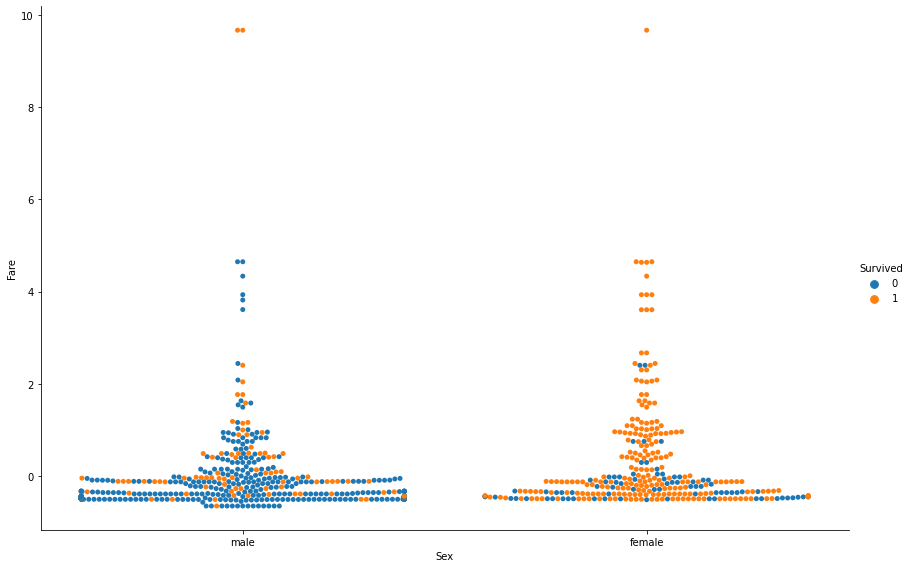

In [99]:
sns.catplot(x='Sex', y='Fare', data=df, hue='Survived', kind='swarm', height=8, aspect=1.5)
plt.show()

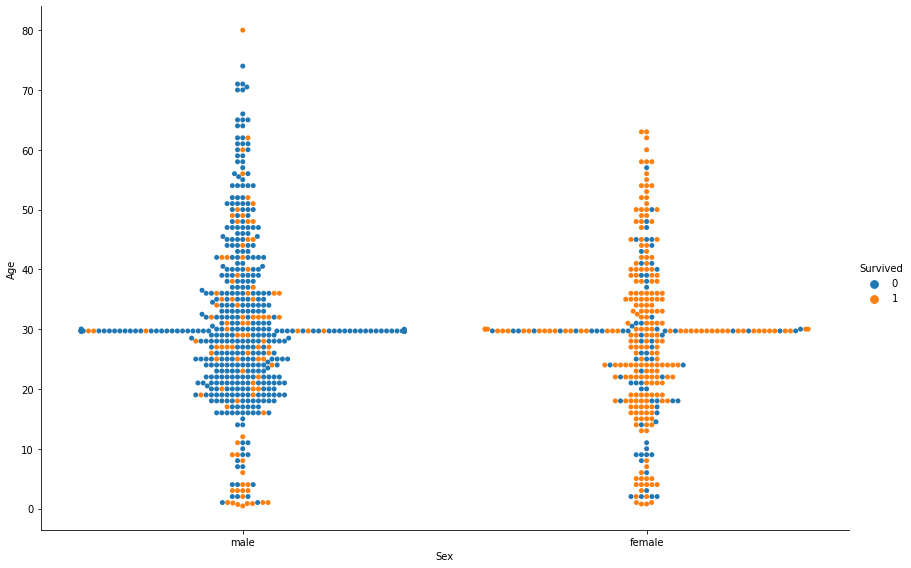

In [100]:
sns.catplot(x='Sex', y='Age', data=df, hue='Survived', kind='swarm', height=8, aspect=1.5)
plt.show()

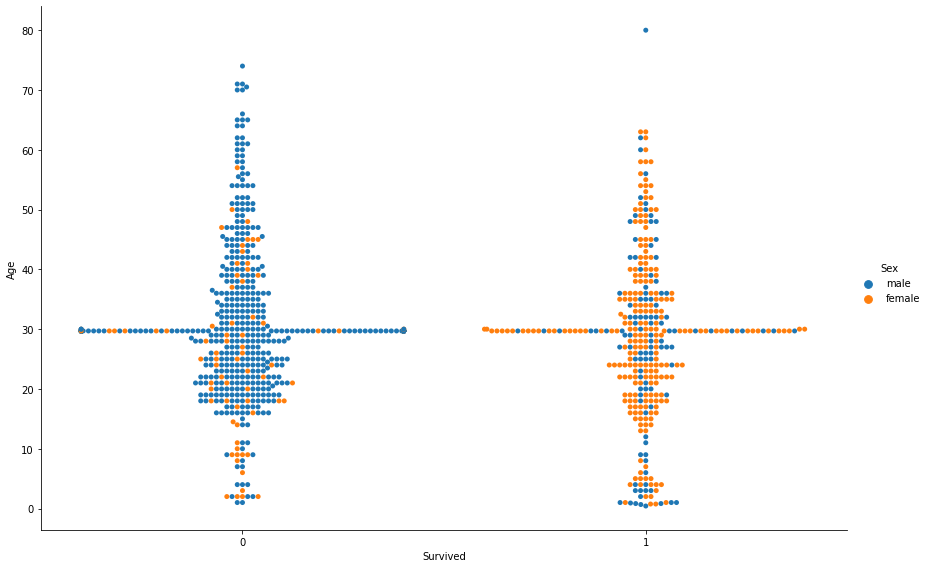

In [101]:
sns.catplot(x='Survived', y='Age', data=df, hue='Sex', kind='swarm', height=8, aspect=1.5)
plt.show()

In [102]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket      Fare Embarked  
0      0         A/5 21171 -0.502445        S  
1      0          PC 17599  0.786845        C  
2      0  STON/O2. 3101282 -0.488854        S  
3      0            113803  0.420730        S  
4      0            373450 -0.486337        S

In [103]:
# Dropping PassengerId, Name and Ticket Columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df.shape

(891, 8)

In [104]:
df = pd.get_dummies(df, drop_first=True)

In [105]:
df.head(10)

Survived  Pclass        Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0         0       3  22.000000      1      0 -0.502445         1           0   
1         1       1  38.000000      1      0  0.786845         0           0   
2         1       3  26.000000      0      0 -0.488854         0           0   
3         1       1  35.000000      1      0  0.420730         0           0   
4         0       3  35.000000      0      0 -0.486337         1           0   
5         0       3  29.699118      0      0 -0.478116         1           1   
6         0       1  54.000000      0      0  0.395814         1           0   
7         0       3   2.000000      3      1 -0.224083         1           0   
8         1       3  27.000000      0      2 -0.424256         0           0   
9         1       2  14.000000      1      0 -0.042956         0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  
5           0  
6           1  
7           1  
8           1  
9           0

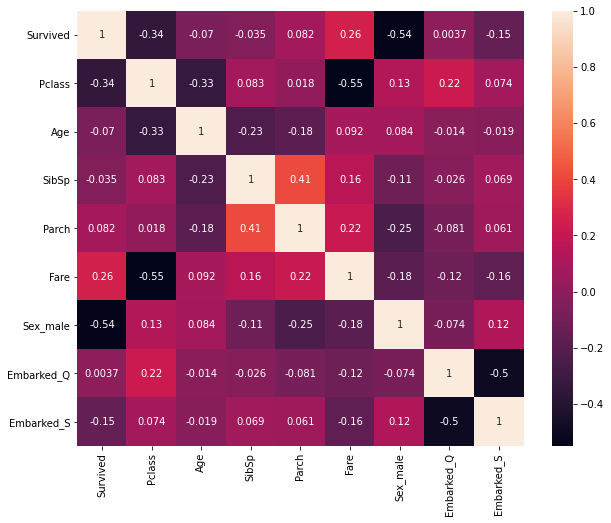

In [107]:
plt.figure(figsize=[10,8])
sns.heatmap(df.corr(), annot=True)
plt.show()

In [108]:
#

In [109]:
X = df.drop('Survived', axis=1)
y = df['Survived']
print(X.shape)
print(y.shape)

(891, 8)
(891,)


In [110]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 8)
(223, 8)
(668,)
(223,)


In [111]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

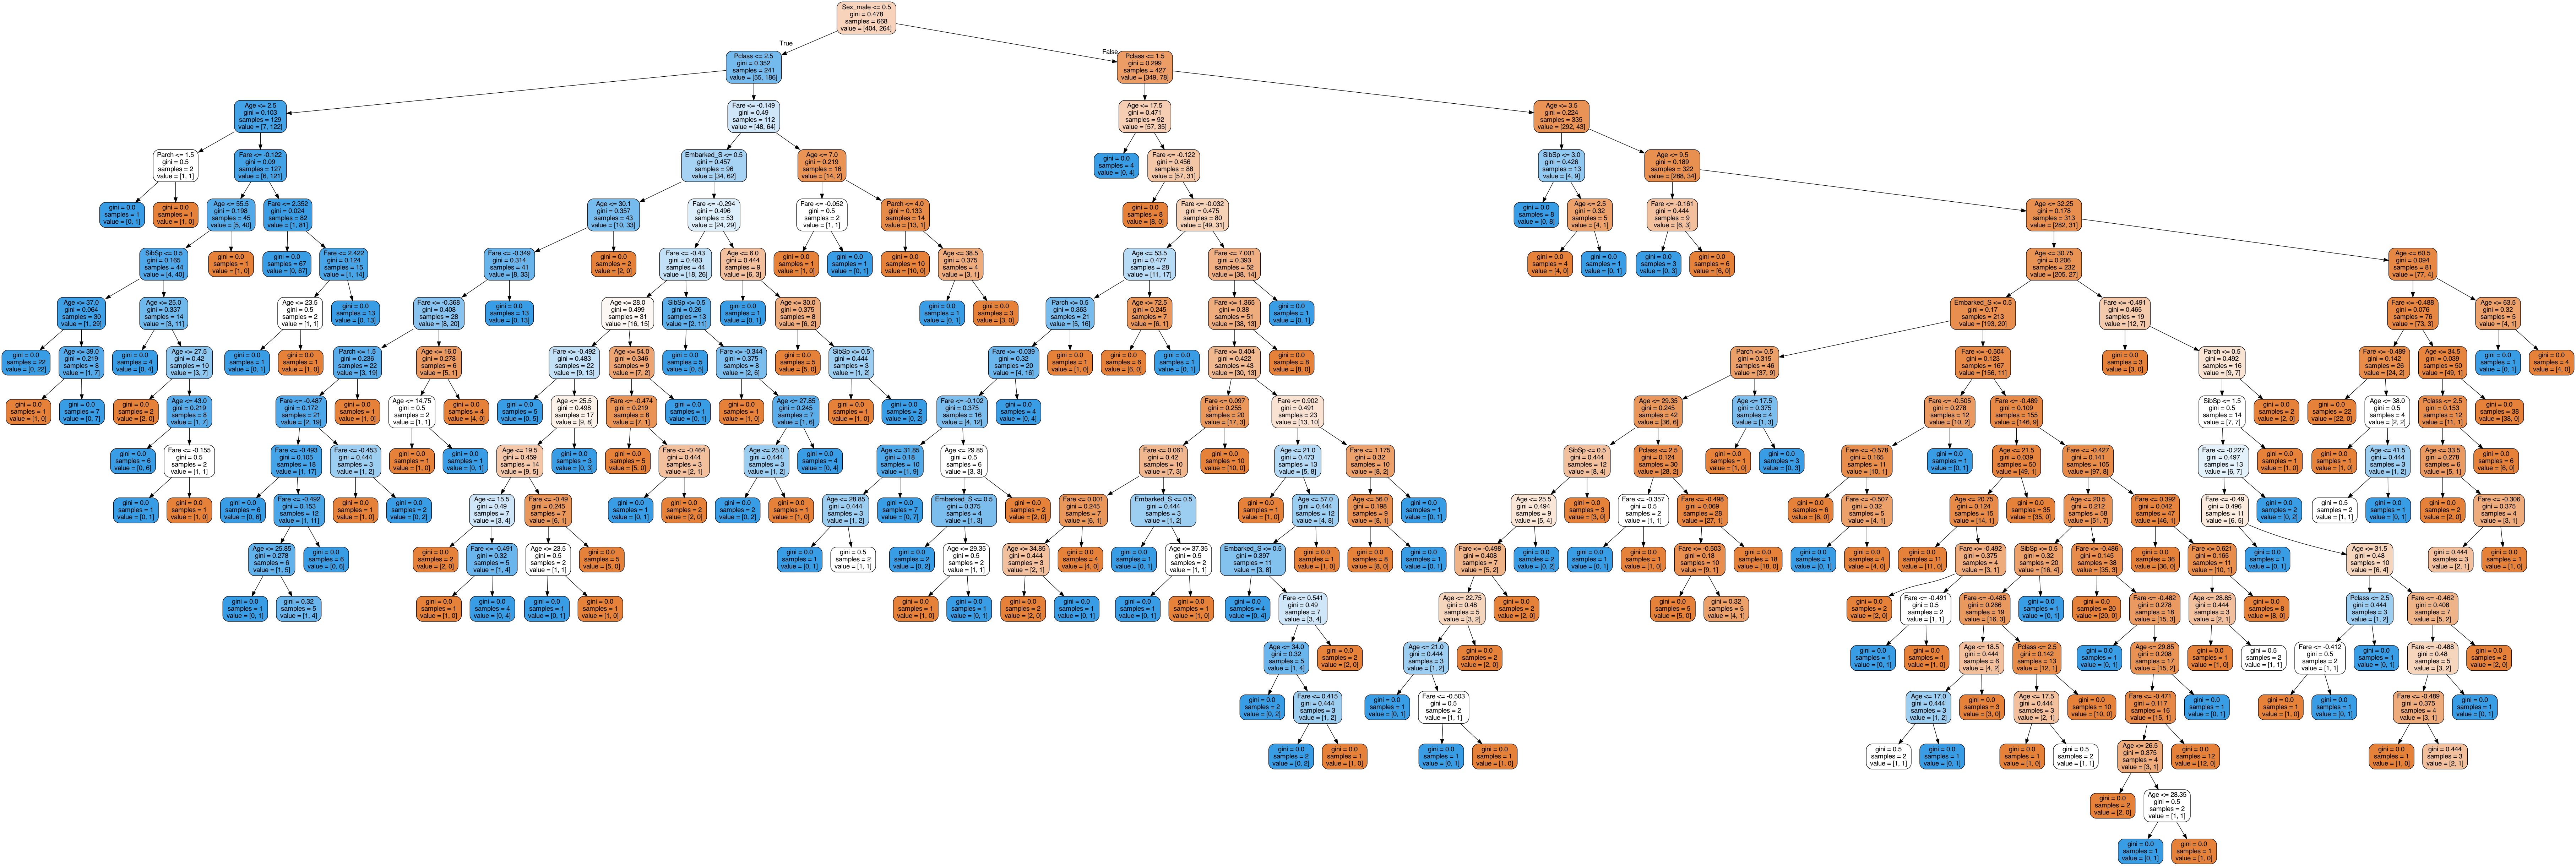

In [160]:
features = list(X.columns)
cls = list(y.unique())

# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf, feature_names = features, rounded = True, filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [113]:
clf.score(X_train, y_train)

0.9865269461077845

In [114]:
clf.score(X_test, y_test)

0.7802690582959642

In [115]:
y_pred = clf.predict(X_test)

In [116]:
confusion_matrix(y_test, y_pred)

array([[119,  26],
       [ 23,  55]])

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       145
           1       0.68      0.71      0.69        78

    accuracy                           0.78       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223



In [122]:
precision_score(y_test, y_pred)

0.6790123456790124

In [123]:
recall_score(y_test, y_pred)

0.7051282051282052

In [125]:
f1_score(y_test, y_pred)

0.6918238993710691

In [126]:
#

In [127]:
#

In [128]:
#

In [155]:
# HyperParameter Tuning
grid_param = {'criterion': ['gini', 'entropy'],
              'max_depth' : range(2,32,1),
              'min_samples_leaf' : range(1,10,1),
              'min_samples_split': range(2,10,1),
              'splitter' : ['best', 'random']}

In [157]:
grid_search = GridSearchCV(estimator=clf, param_grid=grid_param, cv=5, n_jobs =-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [158]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'splitter': 'random'}

In [159]:
grid_search.best_score_

0.824812030075188

In [161]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=8,
                       splitter='random')

In [162]:
grid_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                                  min_samples_split=8, splitter='random')
grid_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=8,
                       splitter='random')

In [163]:
grid_clf.score(X_train, y_train)

0.8218562874251497

In [164]:
grid_clf.score(X_test, y_test)

0.8026905829596412

In [165]:
y_pred_grid = grid_clf.predict(X_test)

In [167]:
confusion_matrix(y_test, y_pred_grid)

array([[135,  10],
       [ 34,  44]])

In [166]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       145
           1       0.81      0.56      0.67        78

    accuracy                           0.80       223
   macro avg       0.81      0.75      0.76       223
weighted avg       0.80      0.80      0.79       223



In [168]:
precision_score(y_test, y_pred_grid)

0.8148148148148148

In [169]:
recall_score(y_test, y_pred_grid)

0.5641025641025641

In [170]:
f1_score(y_test, y_pred_grid)

0.6666666666666667

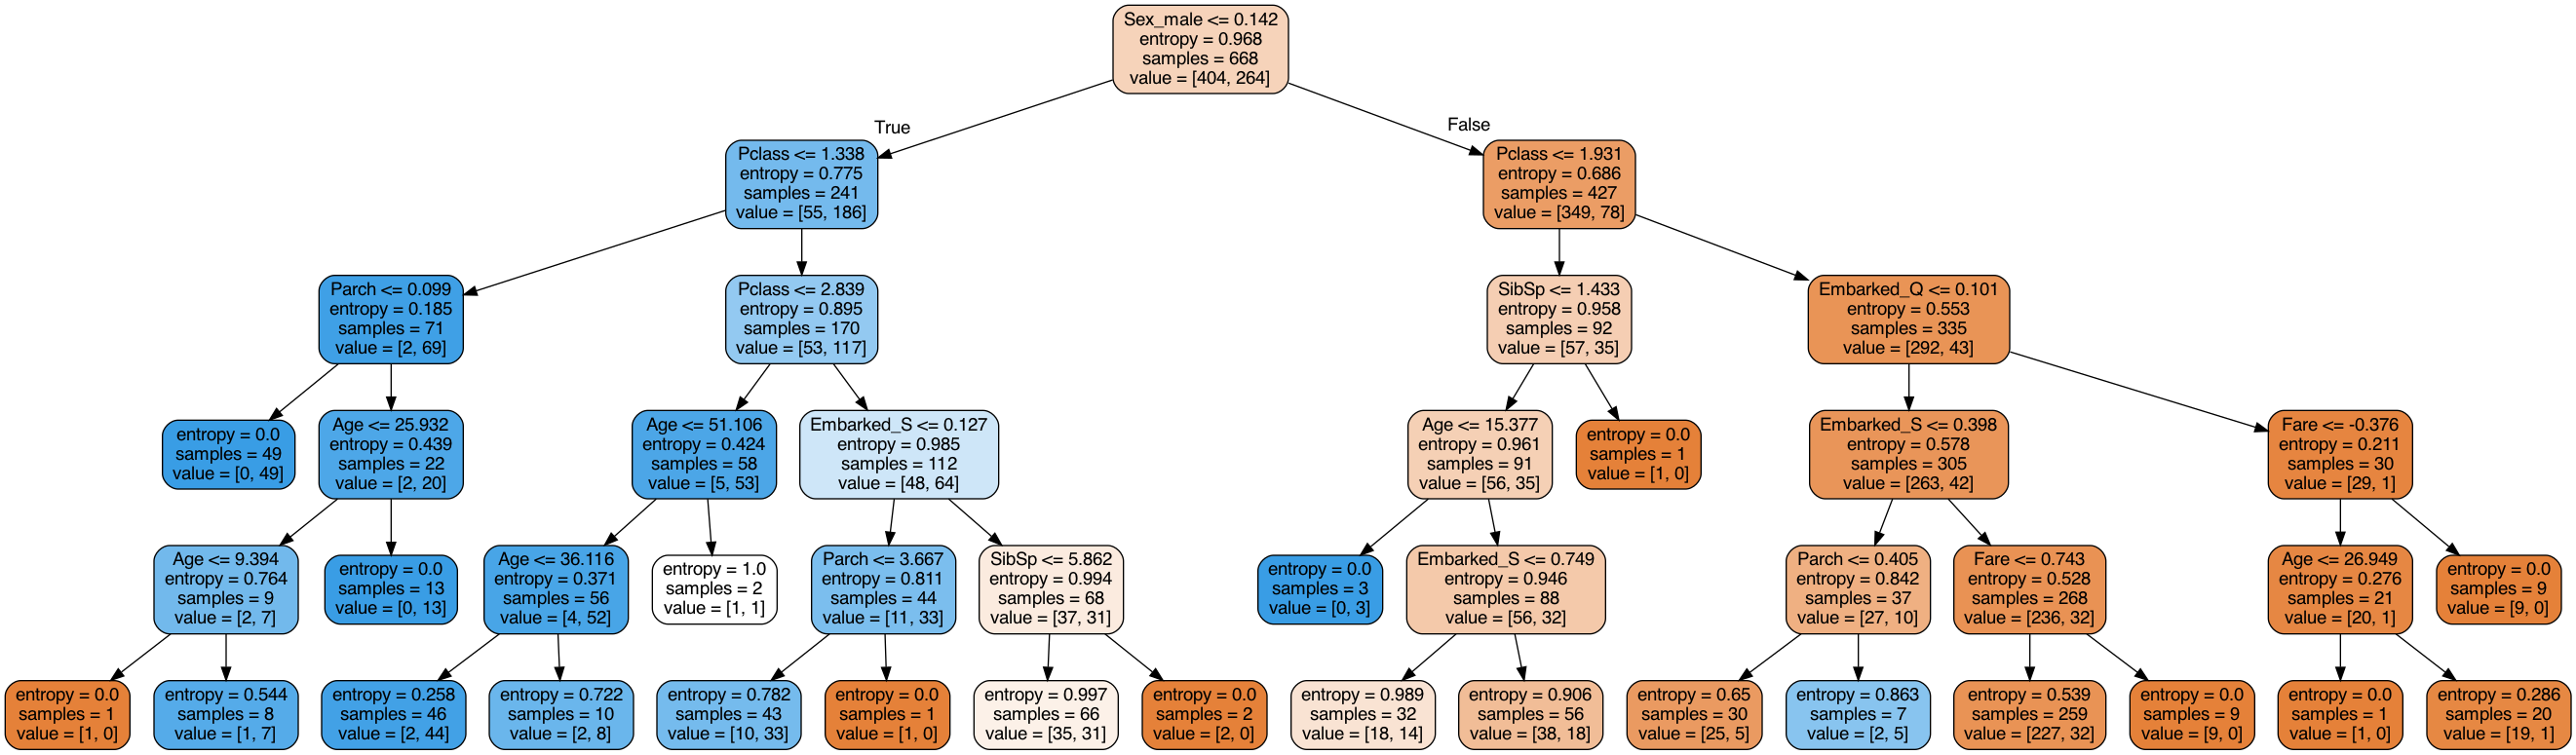

In [171]:
features = list(X.columns)
cls = list(y.unique())

# create a dot_file which stores the tree structure
dot_data = export_graphviz(grid_clf, feature_names = features, rounded = True, filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree_gridcv.png")
# Show graph
Image(graph.create_png())